In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 2060 (UUID: GPU-380040ef-0399-d9a4-9c93-391f6718fa1c)


In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
GPU_ID = "GPU-380040ef-0399-d9a4-9c93-391f6718fa1c"
IMG_SIZE = 300
BATCH_SIZE= 64

In [4]:
import os
import pickle as pkl
import json
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = GPU_ID

In [6]:
x_train=pkl.load(open('X_train.pkl','rb'))
y_train=pkl.load(open('Y_train.pkl','rb'))
x_test=pkl.load(open('X_test.pkl','rb'))
y_test=pkl.load(open('Y_test.pkl','rb'))

In [7]:
x_train  = x_train.reshape(93000, 300, 300,1)
x_test  = x_test.reshape(840, 300, 300,1)

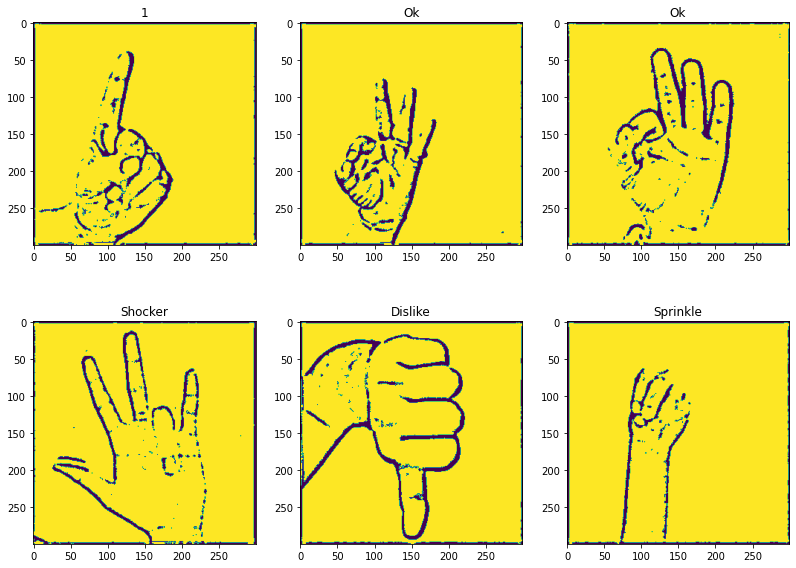

In [8]:
with open('config.json','r')as f:
    x=json.load(f)['gesture']

a=[random.randint(0,93000) for i in range(6)]
figure, axis = plt.subplots(2, 3,figsize=(15,15))
k=0
for i in range(2):
    for j in range(3):
        axis[i,j].imshow(x_train[a[k]])
        axis[i,j].set_title(x[str(np.where(y_train[a[k]] == 1)[0][0])])
        k+=1
plt.subplots_adjust(left=0.2,
                    bottom=0.01, 
                    right=0.9, 
                    top=0.5, 
                    wspace=0.2, 
                    hspace=0.3)
plt.show()

In [9]:
x_train//=255
x_test//=255

In [10]:
img_gen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.15,
                             horizontal_flip=True,
                             fill_mode="nearest")

In [11]:
train_data = img_gen.flow(x_train,y_train,batch_size=BATCH_SIZE)
test_data = img_gen.flow(x_test,y_test,batch_size=BATCH_SIZE)

In [18]:
len(test_data)

14